In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns


In [5]:
df =pd.read_csv('Datasets/heart.csv')
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.output.value_counts()
#df.cp.value_counts()
#df.fbs.value_counts()


1    165
0    138
Name: output, dtype: int64

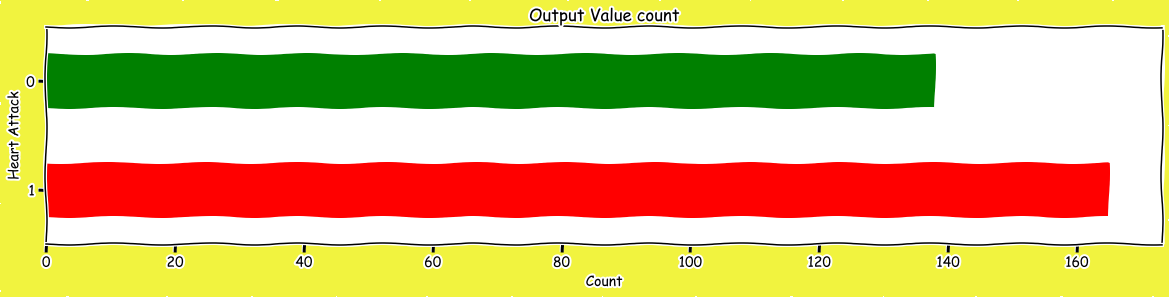

In [8]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#f1f33f')
    df.output.value_counts().plot(kind='barh',color=['red','green'])
    
    plt.title('Output Value count')
    plt.xlabel('Count')
    plt.ylabel('Heart Attack')

In [9]:
#df.sex.value_counts()
df['sex'].value_counts()


1    207
0     96
Name: sex, dtype: int64

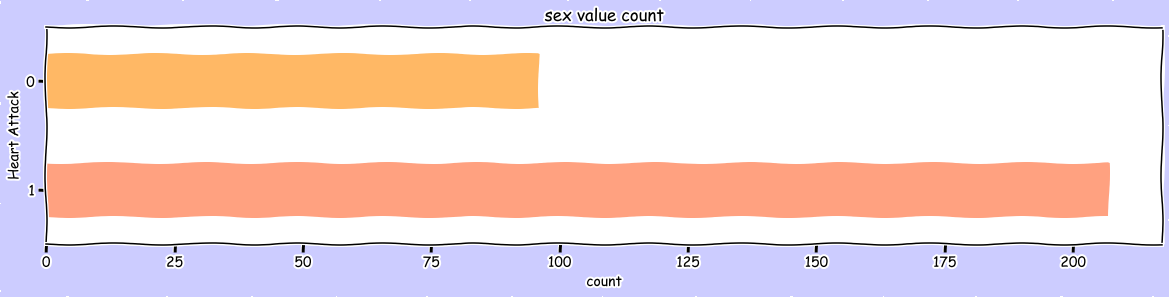

In [10]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    df.sex.value_counts().plot(kind='barh',color=['#ffa180','#ffb865'])
    plt.title('sex value count')
    plt.xlabel('count')
    plt.ylabel('Heart Attack')

<Figure size 1440x288 with 0 Axes>

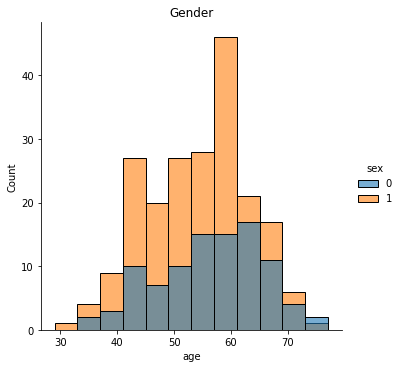

In [11]:
plt.figure(figsize=(20,4))
sns.displot(x='age',hue='sex',data=df,alpha=0.6)
plt.title('Gender')
plt.show()

<Figure size 1440x288 with 0 Axes>

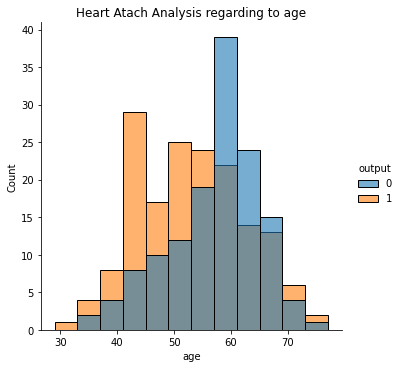

In [12]:
plt.figure(figsize=(20,4))
sns.displot(x='age',hue='output',data=df,alpha=0.6)
plt.title('Heart Atach Analysis regarding to age')
plt.show()

<Figure size 1440x288 with 0 Axes>

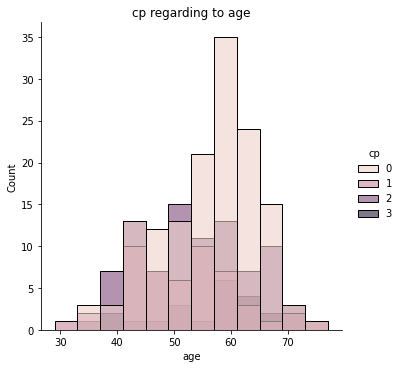

In [13]:
plt.figure(figsize=(20,4))
sns.displot(x='age',hue='cp',data=df,alpha=0.6)
plt.title('cp regarding to age')
plt.show()

C:\Users\hasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


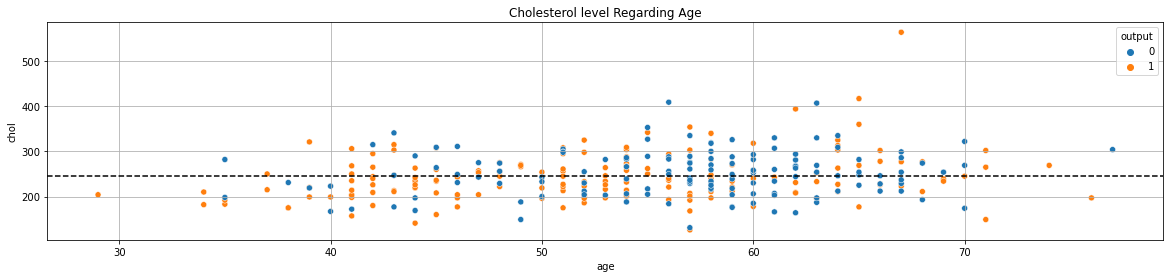

In [14]:
#chol  level regarding to Age
plt.figure(figsize=(20,4))
sns.scatterplot(df['age'], df['chol'],hue=df['output'])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Cholesterol level Regarding Age')
plt.axhline(df['chol'].mean(),linestyle='--',color='black')
plt.grid(True)
plt.style.use('ggplot')

C:\Users\hasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


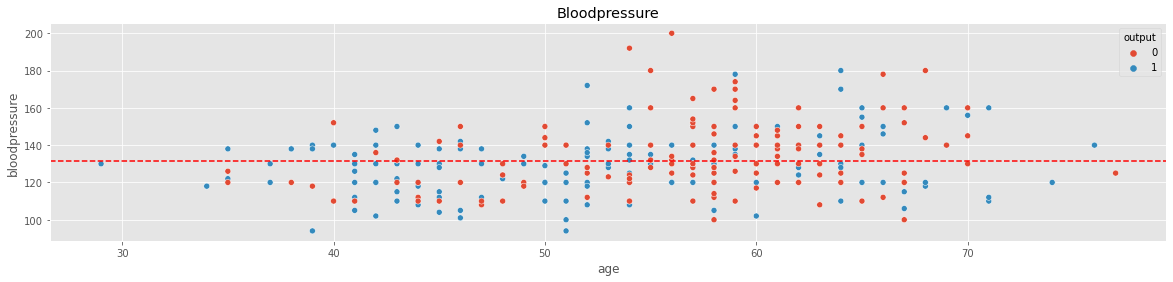

In [15]:
plt.figure(figsize=(20,4))
sns.scatterplot(df['age'],df['trtbps'],hue=df['output'])
plt.xlabel('age')
plt.ylabel('bloodpressure')
plt.title('Bloodpressure')
plt.axhline(df['trtbps'].mean(),linestyle='--',color='red')
plt.grid('True')
plt.style.use('ggplot')

Text(0.5, 1.0, 'chol with fasting Blood Sugar')

<Figure size 1440x288 with 0 Axes>

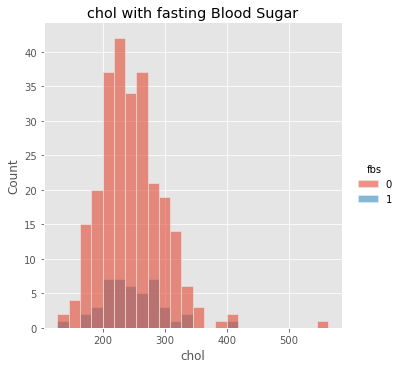

In [16]:
plt.figure(figsize=(20,4))
sns.displot(x='chol',hue='fbs', data=df ,alpha=0.6)
plt.title('chol with fasting Blood Sugar')

C:\Users\hasso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogramm')

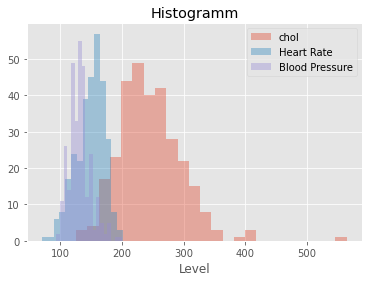

In [17]:
sns.distplot(a=df['chol'],label='chol',kde=False)
sns.distplot(a=df['thalachh'],label='Heart Rate',kde=False)
sns.distplot(a=df['trtbps'], label='Blood Pressure',kde=False)
plt.legend() 
plt.xlabel('Level')
plt.title('Histogramm')

In [18]:
column=df.shape[1]
x=df.iloc[:,:column-1]
y=df.iloc[:,column-1:column]
positive= df[df['output'].isin([1])]
negative= df[df['output'].isin([0])]



In [19]:
x=np.asarray(x)
y=np.asarray(y)


In [20]:
from sklearn import preprocessing


In [23]:
x=preprocessing.StandardScaler().fit(x).transform(x)
print(x)



[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('train set :' ,X_train.shape,Y_train.shape)
print('test set :',X_test.shape,Y_test.shape)

train set : (242, 13) (242, 1)
test set : (61, 13) (61, 1)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR= LogisticRegression(C=0.01,solver='liblinear').fit(X_train,Y_train)
LR

C:\Users\hasso\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.01, solver='liblinear')

In [31]:
yhat=LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [32]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[0.37631007, 0.62368993],
       [0.72008853, 0.27991147],
       [0.40239548, 0.59760452],
       [0.19110398, 0.80889602],
       [0.40269454, 0.59730546],
       [0.5020939 , 0.4979061 ],
       [0.63153146, 0.36846854],
       [0.23317107, 0.76682893],
       [0.49337482, 0.50662518],
       [0.36550033, 0.63449967],
       [0.4291565 , 0.5708435 ],
       [0.20223981, 0.79776019],
       [0.39380703, 0.60619297],
       [0.56885837, 0.43114163],
       [0.33174526, 0.66825474],
       [0.86267505, 0.13732495],
       [0.29399232, 0.70600768],
       [0.29111268, 0.70888732],
       [0.6773343 , 0.3226657 ],
       [0.45853907, 0.54146093],
       [0.24193055, 0.75806945],
       [0.3911356 , 0.6088644 ],
       [0.80506229, 0.19493771],
       [0.46215773, 0.53784227],
       [0.45177731, 0.54822269],
       [0.75409356, 0.24590644],
       [0.58954187, 0.41045813],
       [0.22639078, 0.77360922],
       [0.43524412, 0.56475588],
       [0.80517928, 0.19482072],
       [0.

In [37]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,yhat)

0.825